**Assignment 1, Challenge 1**

In [7]:
# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')


In [5]:
#Installs the neccessary packages.

! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
! pip install -q 'gwpy==3.0.8'
! pip install -q 'gwosc==0.5.4'


In [6]:
#Downloads the data.

! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

--2024-02-25 20:50:41--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge1.gwf [following]
--2024-02-25 20:50:42--  https://gwosc.org/s/workshop3/challenge/challenge1.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M  9.93MB/s    in 0.4s    

2024-02-25 20:50:42 (9.93 MB/s) - ‘challenge1.gwf’ saved [4025674/4025674]



Duration:  127.999755859375 s
Sampling Rate:  4096.0 Hz
Plot in the Time Domain:


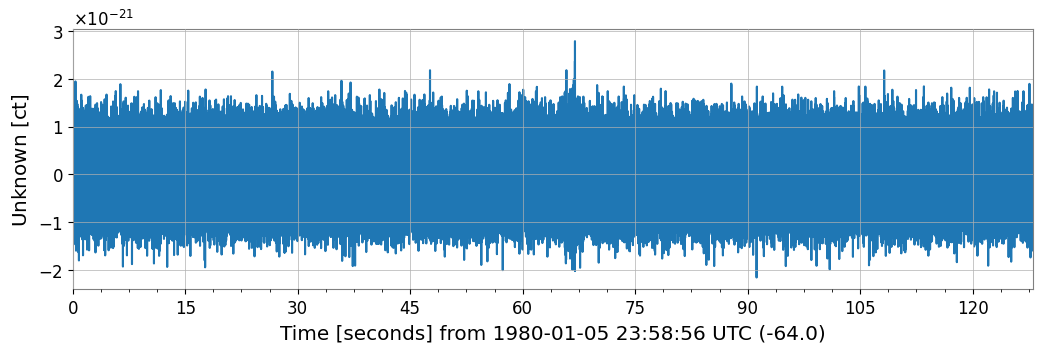

In [8]:
#Reads the data and outputs duration and sampling rate as well as a simple plot in the time domain.

from gwpy.timeseries import TimeSeries
data = TimeSeries.read('challenge1.gwf', channel='H1:CHALLENGE1')
print("Duration: ", data.times[-1]-data.times[0])
print("Sampling Rate: ", data.sample_rate)
%matplotlib inline
print("Plot in the Time Domain:")
plot = data.plot()

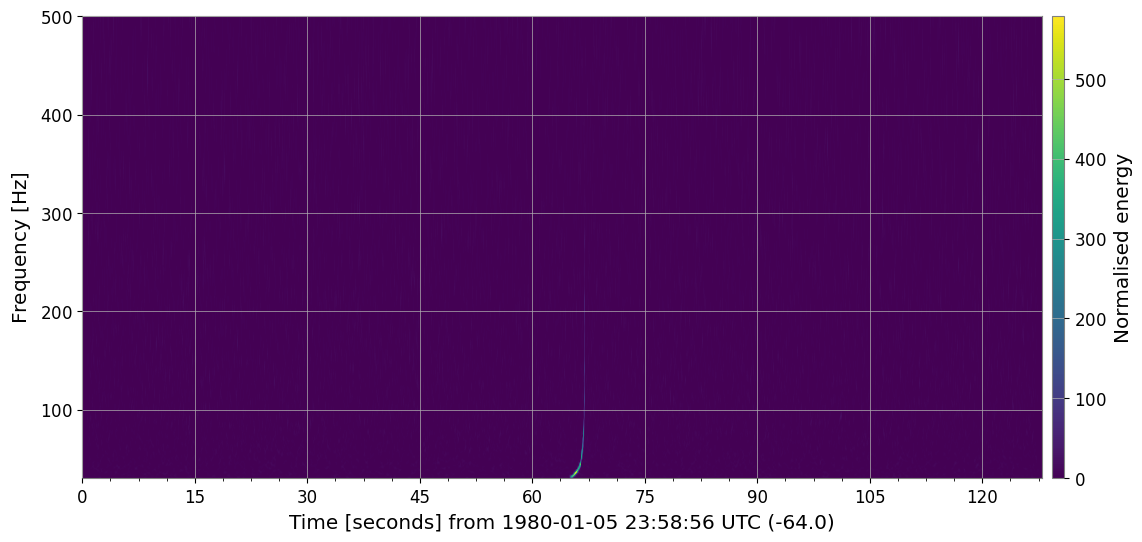

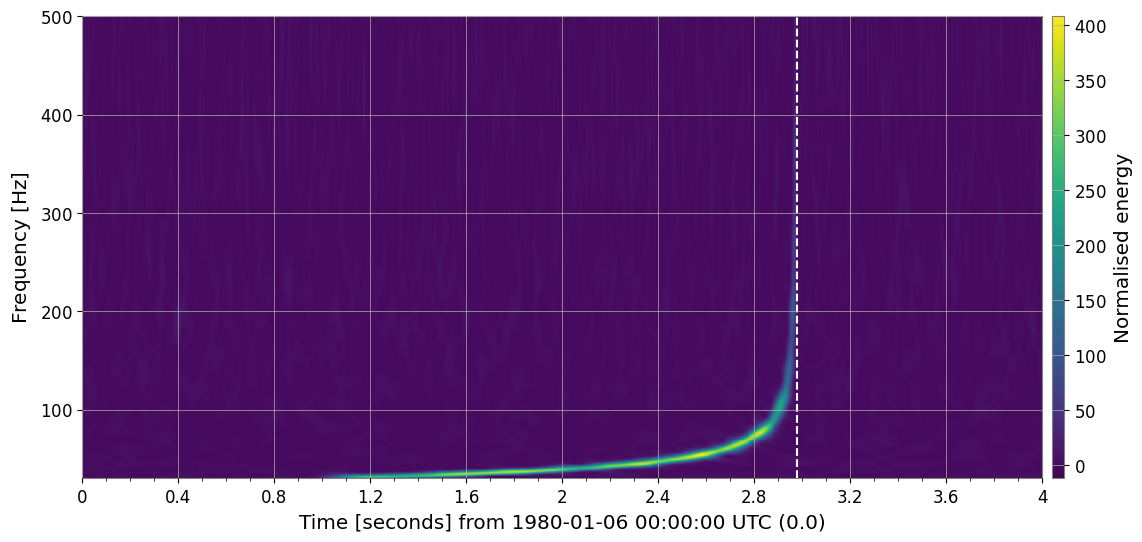

Time of Merger: 1980/01/06 00:00:02.98 UTC 


In [12]:
#Plots and q transforms the data.

hq = data.q_transform(frange=(30, 500))
plot = hq.plot()
ax = plot.gca()
ax.colorbar(label="Normalised energy")

import matplotlib.pyplot as plt
hq2 = data.q_transform(frange=(30, 500), qrange=(10,25),outseg=(0,4))
plot2 = hq2.plot()
ax2 = plot2.gca()
ax2.colorbar(label="Normalised energy")
plt.axvline(x=2.98, color='white', linestyle='--')
plt.show()
print("Time of Merger: 1980/01/06 00:00:02.98 UTC ")

**Assignment 1, Challenge 2**

In [15]:
#Downloads the data.

! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf

--2024-02-25 21:14:20--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge2.gwf [following]
--2024-02-25 21:14:20--  https://gwosc.org/s/workshop3/challenge/challenge2.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf.1’

challenge2.gwf.1    100%[===================>]   3.84M  8.98MB/s    in 0.4s    

2024-02-25 21:14:20 (8.98 MB/s) - ‘challenge2.gwf.1’ saved [4025842/4025842]



In [ ]:
#Imports the neccessary packages.

import matplotlib.pyplot as plt
import pylab
%matplotlib inline
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass
from pycbc import frame

In [ ]:
#Imports the data.

from gwpy.timeseries import TimeSeries
data2 = TimeSeries.read('challenge2.gwf', channel='H1:CHALLENGE2')

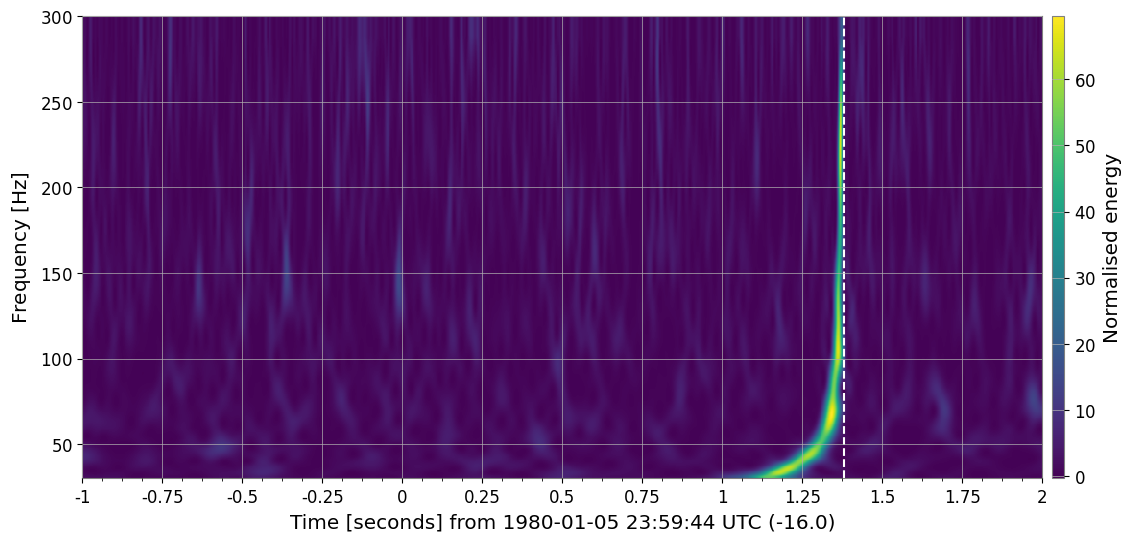

Time of Merger: 1980/01/05 23:59:45.38 UTC


In [34]:
#Q transforms and plots the data.

hq3 = data2.q_transform(frange=(30, 300), qrange=(10,25), outseg=(47-64,50-64))
plot3 = hq3.plot()
ax3 = plot3.gca()
ax3.colorbar(label="Normalised energy")
plt.axvline(x=-16+1.38, color='white', linestyle='--')
plt.show()
print('Time of Merger: 1980/01/05 23:59:45.38 UTC')

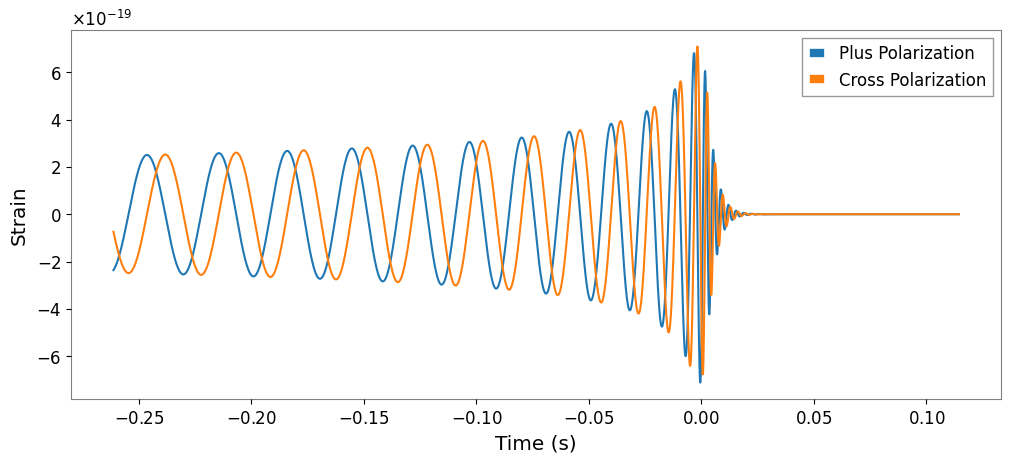

In [17]:
#Plots the waveform.


from pycbc.waveform import get_td_waveform
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=30,
                         mass2=30,
                         delta_t=1.0/16384,
                         f_lower=30)

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

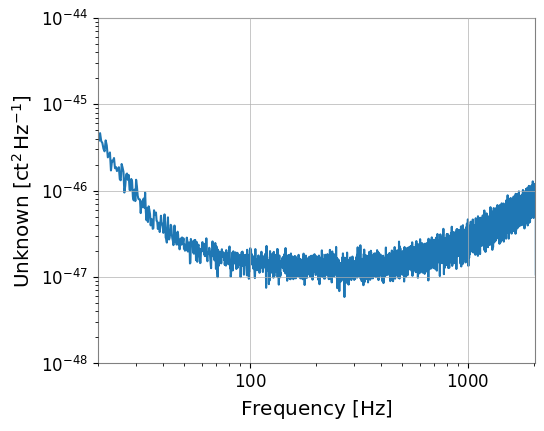

In [18]:
#Plots the PSD.

psd = data2.psd(fftlength=4, overlap=2, method="median")
plot3 = psd.plot(xscale='log', yscale='log', xlim=(20,2020), ylim=(10e-49, 10e-45))
plot3.show(warn=False)

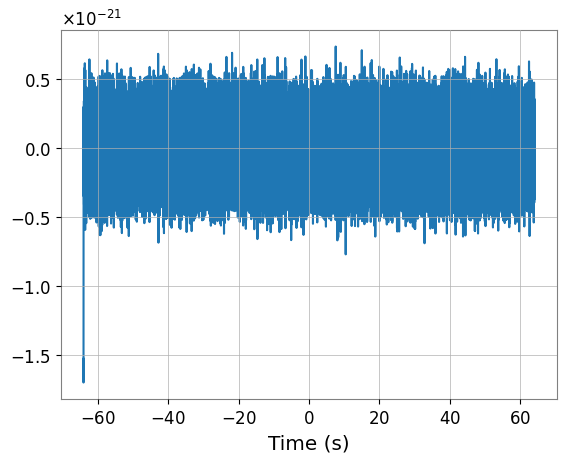

In [19]:
#Reads the data as well as resampling.

strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()

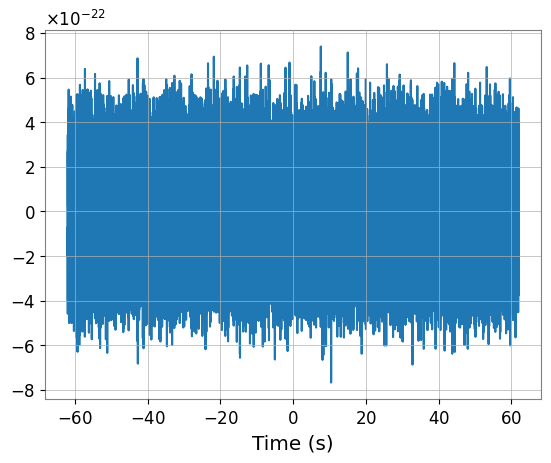

In [20]:
# Crops the data.

conditioned = strain.crop(2, 2)
pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [21]:
#Welch method with 4 second intervals.

from pycbc.psd import interpolate, inverse_spectrum_truncation

psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

In [22]:
from pycbc.waveform import get_td_waveform

m = 30
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)
hp.resize(len(conditioned))

Text(0, 0.5, 'Strain')

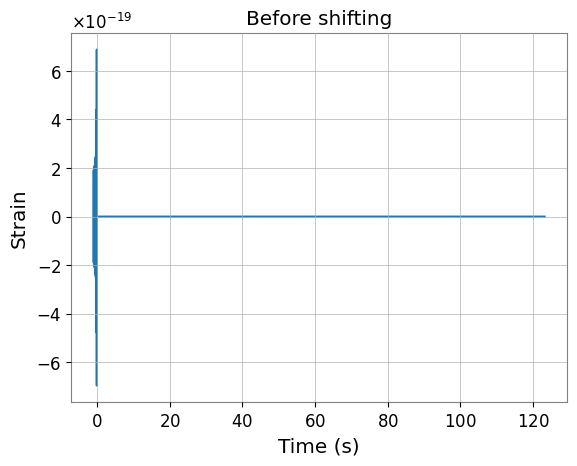

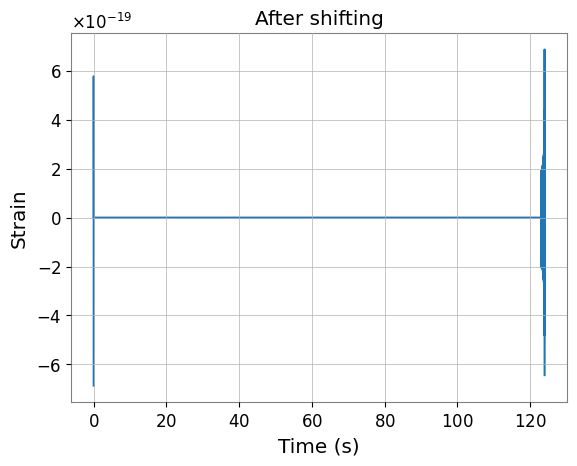

In [23]:
# Plots signal.

pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

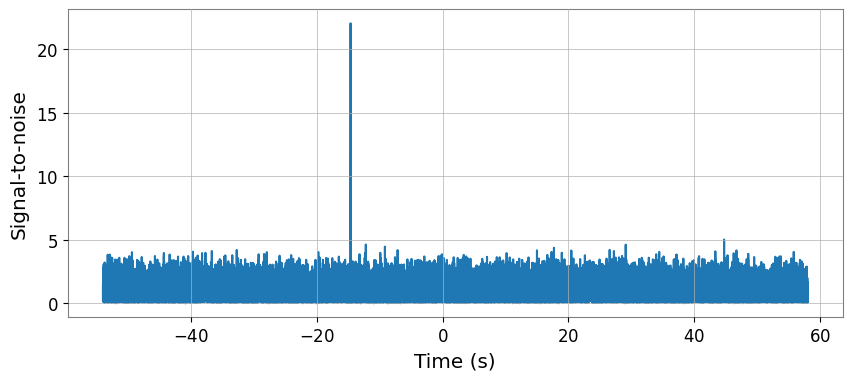

Found a signal at -14.6328125s with SNR 22.054545591712557


In [33]:
#Plots SNR.

from pycbc.filter import matched_filter

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("Found a signal at {}s with SNR {}".format(time, abs(snrp)))

**Assignment 2, Challenge 2**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0, 0.5, 'strain')

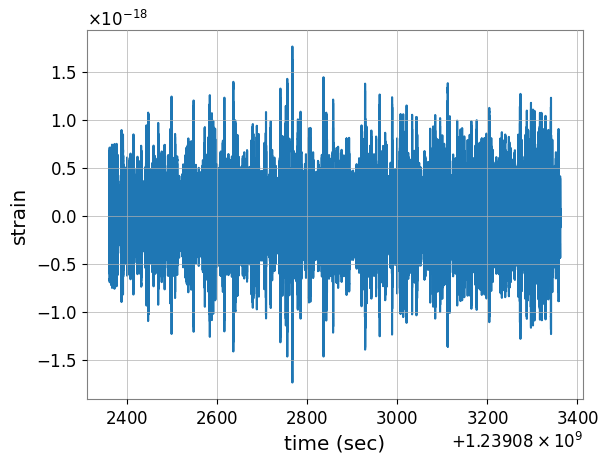

In [42]:
#Imports the neccessary packages.

import pylab
from pycbc.catalog import Merger
from pycbc.filter import resample_to_delta_t, highpass

import numpy as np
import pycbc
from pycbc.types import FrequencySeries, TimeSeries
import matplotlib.pyplot as plt


from google.colab import drive

import pycbc.pds
import pycbc.types





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0, 0.5, 'strain')

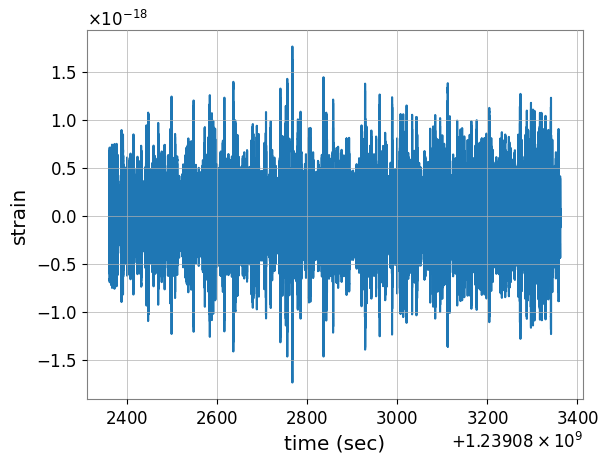

In [44]:
#Loads and plots the data.

drive.mount('/content/drive')

file_path = "/content/drive/My Drive/Colab Notebooks/noise_ts_4096Hz.npy"
data = np.load(file_path)

time = data[:, 0]
data = pycbc.types.TimeSeries(data[:, 1], delta_t = time[1]-time[0])
plt.plot(time, data)
plt.xlabel('time (sec)')
plt.ylabel('strain')


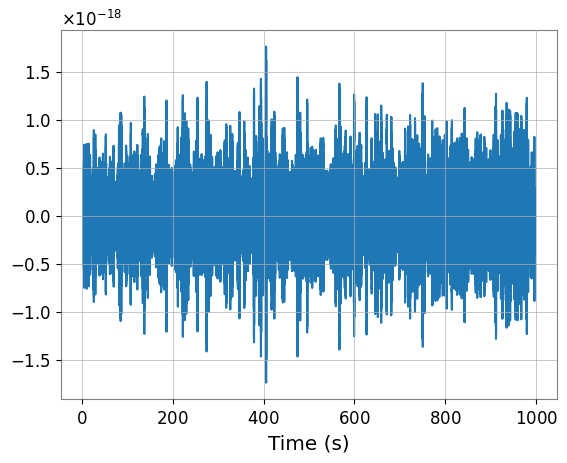

In [45]:
#Crops and plots the data.


conditioned = data.crop(4, 4)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

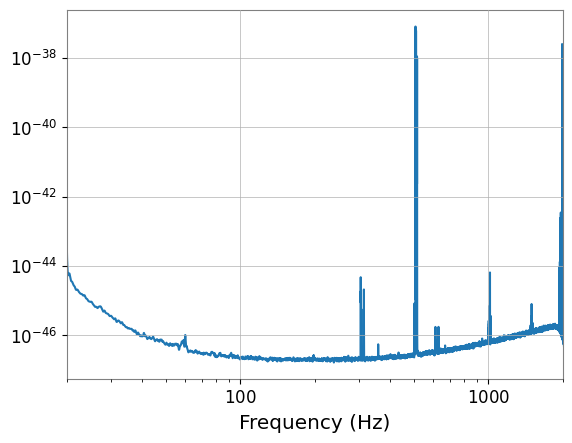

In [59]:
#Conditions and plots the PSD in the log scale.

from pycbc.psd import interpolate, inverse_spectrum_truncation

psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=20)

plt.loglog(psd.sample_frequencies, psd)
plt.xlim(xmin=20, xmax=2000)
plt.xlabel('Frequency (Hz)')
plt.show()

In [48]:
from pycbc.waveform import get_td_waveform

m = 10
hp, hc = get_td_waveform(approximant="TaylorT4",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)


hp.resize(len(conditioned))
template = hp.cyclic_time_shift(hp.start_time)

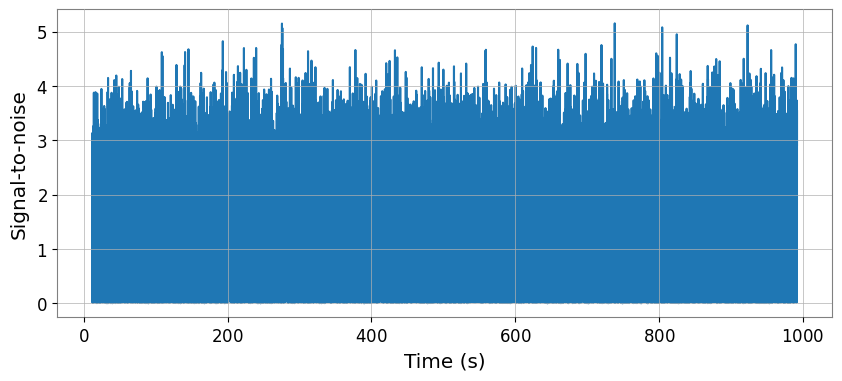

Found a signal at 738.473388671875s with SNR 5.155292902901349
As shown, no outstanding SNR found.


In [51]:
from pycbc.filter import matched_filter

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)


pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("Found a signal at {}s with SNR {}".format(time, abs(snrp)))
print("As shown, no outstanding SNR found.")

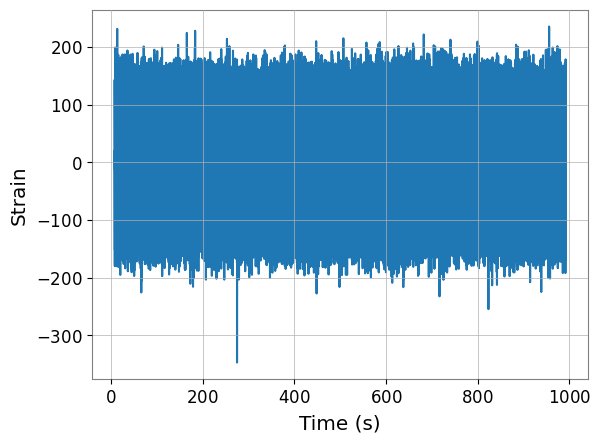

In [52]:
#Plots and finds ideal SNR.

data_ft = conditioned.to_frequencyseries()

for i in range(len(psd)):
    data_ft[i] = (data_ft[i] / (psd[i]**0.5))

.
white_data = data_ft.to_timeseries()
crp_white_data = white_data.crop(4, 4)

pylab.plot(crp_white_data.sample_times, crp_white_data)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

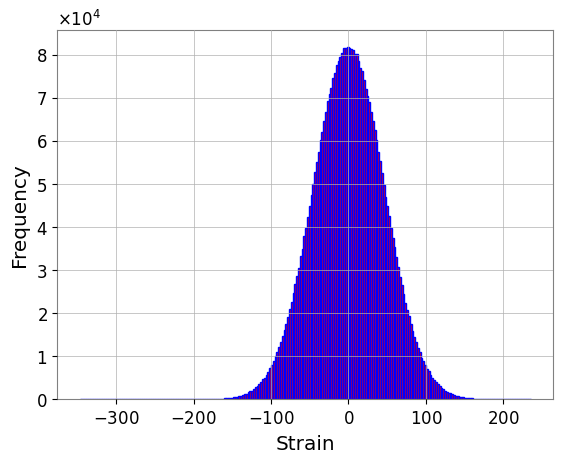

In [58]:
#Plots a histogram of the whitened data.

plt.hist(crp_white_data, bins=250, color='red', edgecolor = 'blue')
plt.xlabel('Strain')
plt.ylabel('Frequency')
plt.show()
print("As we can see the plot follows Gaussian distribution.")

In [54]:
#SNR analysis of chunks.


from pycbc.waveform import get_fd_waveform
from pycbc.filter import sigmasq

hp2, hc2 = get_fd_waveform(approximant="TaylorF2",
                            mass1=3,
                            mass2=3,
                            delta_f=conditioned.delta_f ,
                            distance = 500,
                            f_lower=20.0, f_final = 2048.0)


psd_chnks = []
SNR = []
chnk_lgth = int(conditioned.get_duration()*conditioned.sample_rate/124 - 1)
strt = 0
print('The data has been cut into 124 chunks of {} seconds'.format((chnk_lgth + 1)/conditioned.sample_rate))


for i in range(124):
  strt = i * chnk_lgth
  chnk = conditioned[strt : strt + chnk_lgth]
  psd_chnks.append(chnk.psd(4))
  psd_chnks[i] = interpolate(psd_chnks[i], conditioned.delta_f)
  psd_chnks[i] = inverse_spectrum_truncation(psd_chnks[i], int(4 * conditioned.sample_rate),
                                              low_frequency_cutoff=20)

  SNR.append((pycbc.filter.sigmasq(hp2, psd_chnks[i]))**0.5)


Data has been cut into 124 chunks of 8.0 seconds


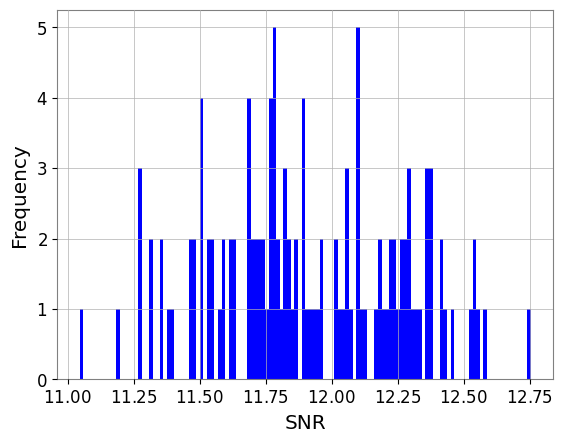

As we can see the plot does not follow Gaussian distribution. Therefore the stationary assumption was not valid.


In [60]:
#Plots histogram of chunked SNR.

plt.hist(SNR, bins = 124, color='blue')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.show()
print("As we can see the plot does not follow Gaussian distribution. Therefore the stationary assumption was not valid.")